# Transfer Learning

Today we will work through retraining the EfficientNetV2S model (pretrained with ImageNet data) to identify Niblet. To find out more about the EfficientNetV2 models, you can read the [original paper](https://arxiv.org/abs/2104.00298). There are several versions of this model (S,M,L) that have progressively more parameters. You can try swapping in the M or L version to see if that improves performance. 

Big idea of transfer learning:
> Use the core of a pre-trained model (trained on a different but similar task) and only train a new set of the final few layers. The parameters in the pre-trained model are frozen, so that they are not updated during the training. 

Resources for more about transfer learning:
* Youtube: [Efficient Image Classification with Transfer Learning and Image Augmentation with TensorFlow Keras](https://youtu.be/CLHk6DniYg0?si=QaASdY0grCUVddWm)
* [Youtube Video Demo Code](https://colab.research.google.com/drive/1-wsOk_fm72QF-bHAq_LKoJ99L4hveXqi?usp=sharing)
* Tensorflow Tutorial: [Transfer Learning with TensoFlow Hub](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub)

In [6]:
# Import necessary packages
import tensorflow as tf

## Import Pre-trained model and freeze layers

In [7]:
from tensorflow.keras.applications import EfficientNetV2S

V2S_model = EfficientNetV2S(weights='imagenet',
                        include_top=False,
                        input_shape=(224, 224, 3))

for layer in V2S_model.layers:
  layer.trainable = False

In [8]:
V2S_model.summary()

Model: "efficientnetv2-s"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        648 │ rescaling[0][0]   │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      5,184 │ stem_activation[… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 112, 112,  │          0 │ block1a_project_… │
│                     │ 24)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 112, 112,  │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 112, 112,  │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 112, 112,  │          0 │ block1b_drop[0][… │
│                     │ 24)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │     20,736 │ block1b_add[0][0] │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b

 Total params: 20,331,360 (77.56 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,331,360 (77.56 MB)

## Create our preprocessing and final layers

We will recreate our image augmentation layers that will feed into the model. We won't need the Rescaling layer, because the EfficientNet model includes that. Feel free to modify the augmentation.

We will also add some final layers to convert the "features" created by the EfficientNet model down to a single output node. 

In [9]:
from tensorflow.keras import layers

image_preprocess = tf.keras.Sequential([
    tf.keras.Input((None,None,3)),
    layers.Resizing(224,224, crop_to_aspect_ratio = True),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
], name = "image_aug")

transfer_model = tf.keras.Sequential([
    tf.keras.Input((None,None,3)),
    image_preprocess,
    V2S_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation = 'sigmoid')
])

transfer_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image_aug (Sequential)          │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-s (Functional)   │ (None, 7, 7, 1280)     │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,118,817 (80.56 MB)

 Trainable params: 787,457 (3.00 MB)

 Non-trainable params: 20,331,360 (77.56 MB)

In [10]:
#maybe bump up threshold here because were getting too many niblets
metrics = [tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy'),
           #Area Under the Curve AUC
           tf.keras.metrics.AUC(),
           #Predict Niblet and actually Niblet
           tf.keras.metrics.TruePositives(),
           #Predict Not_Niblet and actually Not_Niblet
           tf.keras.metrics.TrueNegatives(),
           #Predict Niblet but Not_Niblet
           tf.keras.metrics.FalsePositives(),
           #Predict Not_Niblet but Niblet
           tf.keras.metrics.FalseNegatives()
          ]

transfer_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=metrics)

## Setup Data Pipeline

In [11]:
# You can mess with batch size
BATCH_SIZE = 30
IMAGE_SIZE = (224,224)
SEED = 42

# This sets up a training and validation set from our ../data/ directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    '../data/',
    class_names = ['not_niblet','niblet'],
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=SEED)

# This is the validation set. Notice `shuffle = FALSE` and `subset = validation`
val_dataset = tf.keras.utils.image_dataset_from_directory(
    '../data/',
    class_names = ['not_niblet','niblet'],
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    seed=SEED)

Found 1622 files belonging to 2 classes.
Using 1298 files for training.
Found 1622 files belonging to 2 classes.
Using 324 files for validation.


## Train the Model

Time for some popcorn

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, monitor='val_loss')

history = transfer_model.fit(train_dataset, epochs=100,
                             validation_data=val_dataset,
                             callbacks=[es])

Epoch 1/100


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneo

 1/44 ━━━━━━━━━━━━━━━━━━━━ 5:47 8s/step - accuracy: 0.3333 - auc: 0.4306 - false_negatives: 16.0000 - false_positives: 4.0000 - loss: 0.7835 - true_negatives: 8.0000 - true_positives: 2.0000

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 4/44 ━━━━━━━━━━━━━━━━━━━━ 29s 732ms/step - accuracy: 0.4639 - auc: 0.5325 - false_negatives: 16.5000 - false_positives: 21.5000 - loss: 0.7202 - true_negatives: 8.2500 - true_positives: 28.7500

Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 5/44 ━━━━━━━━━━━━━━━━━━━━ 28s 727ms/step - accuracy: 0.4764 - auc: 0.5531 - false_negatives: 16.6000 - false_positives: 28.0000 - loss: 0.7157 - true_negatives: 9.2000 - true_positives: 36.2000

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 6/44 ━━━━━━━━━━━━━━━━━━━━ 27s 723ms/step - accuracy: 0.4924 - auc: 0.5751 - false_negatives: 16.6667 - false_positives: 33.3333 - loss: 0.7080 - true_negatives: 11.5000 - true_positives: 43.5000

Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 7/44 ━━━━━━━━━━━━━━━━━━━━ 26s 719ms/step - accuracy: 0.5091 - auc: 0.5980 - false_negatives: 16.8571 - false_positives: 37.7143 - loss: 0.6976 - true_negatives: 14.8571 - true_positives: 50.5714

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 8/44 ━━━━━━━━━━━━━━━━━━━━ 25s 718ms/step - accuracy: 0.5236 - auc: 0.6166 - false_negatives: 17.7500 - false_positives: 41.2500 - loss: 0.6877 - true_negatives: 19.3750 - true_positives: 56.6250

Corrupt JPEG data: premature end of data segment


 9/44 ━━━━━━━━━━━━━━━━━━━━ 25s 716ms/step - accuracy: 0.5358 - auc: 0.6308 - false_negatives: 19.3333 - false_positives: 44.1111 - loss: 0.6791 - true_negatives: 24.7778 - true_positives: 61.7778

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


12/44 ━━━━━━━━━━━━━━━━━━━━ 23s 733ms/step - accuracy: 0.5613 - auc: 0.6572 - false_negatives: 26.4167 - false_positives: 51.0000 - loss: 0.6620 - true_negatives: 41.3333 - true_positives: 76.2500

Corrupt JPEG data: premature end of data segment


14/44 ━━━━━━━━━━━━━━━━━━━━ 22s 741ms/step - accuracy: 0.5761 - auc: 0.6719 - false_negatives: 31.2857 - false_positives: 54.4286 - loss: 0.6505 - true_negatives: 53.0714 - true_positives: 86.2143

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


15/44 ━━━━━━━━━━━━━━━━━━━━ 21s 740ms/step - accuracy: 0.5833 - auc: 0.6793 - false_negatives: 33.4000 - false_positives: 56.0667 - loss: 0.6443 - true_negatives: 59.2000 - true_positives: 91.3333

Corrupt JPEG data: premature end of data segment


16/44 ━━━━━━━━━━━━━━━━━━━━ 20s 740ms/step - accuracy: 0.5905 - auc: 0.6865 - false_negatives: 35.3750 - false_positives: 57.5625 - loss: 0.6381 - true_negatives: 65.3125 - true_positives: 96.7500

Corrupt JPEG data: premature end of data segment


19/44 ━━━━━━━━━━━━━━━━━━━━ 18s 738ms/step - accuracy: 0.6080 - auc: 0.7042 - false_negatives: 40.9474 - false_positives: 62.7368 - loss: 0.6227 - true_negatives: 81.5789 - true_positives: 114.7368

Corrupt JPEG data: premature end of data segment


20/44 ━━━━━━━━━━━━━━━━━━━━ 17s 738ms/step - accuracy: 0.6135 - auc: 0.7099 - false_negatives: 42.6000 - false_positives: 64.3500 - loss: 0.6175 - true_negatives: 87.1500 - true_positives: 120.9000

Corrupt JPEG data: premature end of data segment


21/44 ━━━━━━━━━━━━━━━━━━━━ 16s 738ms/step - accuracy: 0.6188 - auc: 0.7152 - false_negatives: 44.2857 - false_positives: 65.8571 - loss: 0.6125 - true_negatives: 92.8095 - true_positives: 127.0476

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9


24/44 ━━━━━━━━━━━━━━━━━━━━ 14s 735ms/step - accuracy: 0.6327 - auc: 0.7291 - false_negatives: 49.4583 - false_positives: 70.1667 - loss: 0.5996 - true_negatives: 109.7917 - true_positives: 145.5833

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


27/44 ━━━━━━━━━━━━━━━━━━━━ 12s 733ms/step - accuracy: 0.6454 - auc: 0.7417 - false_negatives: 54.0370 - false_positives: 74.2222 - loss: 0.5875 - true_negatives: 127.4074 - true_positives: 164.3333

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


28/44 ━━━━━━━━━━━━━━━━━━━━ 11s 732ms/step - accuracy: 0.6493 - auc: 0.7455 - false_negatives: 55.6071 - false_positives: 75.4286 - loss: 0.5838 - true_negatives: 133.3929 - true_positives: 170.5714

Corrupt JPEG data: premature end of data segment


31/44 ━━━━━━━━━━━━━━━━━━━━ 9s 729ms/step - accuracy: 0.6600 - auc: 0.7558 - false_negatives: 60.1936 - false_positives: 79.1290 - loss: 0.5735 - true_negatives: 150.7419 - true_positives: 189.9355 

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


32/44 ━━━━━━━━━━━━━━━━━━━━ 8s 729ms/step - accuracy: 0.6633 - auc: 0.7590 - false_negatives: 61.6875 - false_positives: 80.3125 - loss: 0.5702 - true_negatives: 156.4375 - true_positives: 196.5625

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


33/44 ━━━━━━━━━━━━━━━━━━━━ 8s 728ms/step - accuracy: 0.6665 - auc: 0.7621 - false_negatives: 63.2121 - false_positives: 81.4242 - loss: 0.5671 - true_negatives: 162.2424 - true_positives: 203.1212

Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 711ms/step - accuracy: 0.6950 - auc: 0.7896 - false_negatives: 77.7955 - false_positives: 94.5909 - loss: 0.5367 - true_negatives: 222.0455 - true_positives: 280.0682

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 47s 914ms/step - accuracy: 0.6971 - auc: 0.7916 - false_negatives: 78.9111 - false_positives: 95.8000 - loss: 0.5344 - true_negatives: 227.0667 - true_positives: 286.5778 - val_accuracy: 0.8580 - val_auc: 0.9417 - val_false_negatives: 29.0000 - val_false_positives: 17.0000 - val_loss: 0.3179 - val_true_negatives: 115.0000 - val_true_positives: 163.0000
Epoch 2/100


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneo

 1/44 ━━━━━━━━━━━━━━━━━━━━ 31s 724ms/step - accuracy: 0.7000 - auc: 0.8773 - false_negatives: 8.0000 - false_positives: 1.0000 - loss: 0.5321 - true_negatives: 11.0000 - true_positives: 10.0000

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 4/44 ━━━━━━━━━━━━━━━━━━━━ 28s 709ms/step - accuracy: 0.8056 - auc: 0.9266 - false_negatives: 10.5000 - false_positives: 2.2500 - loss: 0.3769 - true_negatives: 36.0000 - true_positives: 26.2500

Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 5/44 ━━━━━━━━━━━━━━━━━━━━ 27s 714ms/step - accuracy: 0.8191 - auc: 0.9343 - false_negatives: 11.4000 - false_positives: 2.6000 - loss: 0.3560 - true_negatives: 42.8000 - true_positives: 33.2000

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 6/44 ━━━━━━━━━━━━━━━━━━━━ 26s 709ms/step - accuracy: 0.8270 - auc: 0.9373 - false_negatives: 12.6667 - false_positives: 3.0000 - loss: 0.3471 - true_negatives: 50.0000 - true_positives: 39.3333

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9


 7/44 ━━━━━━━━━━━━━━━━━━━━ 26s 706ms/step - accuracy: 0.8327 - auc: 0.9390 - false_negatives: 14.0000 - false_positives: 3.4286 - loss: 0.3414 - true_negatives: 56.8571 - true_positives: 45.7143

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 8/44 ━━━━━━━━━━━━━━━━━━━━ 25s 709ms/step - accuracy: 0.8364 - auc: 0.9399 - false_negatives: 15.5000 - false_positives: 3.8750 - loss: 0.3385 - true_negatives: 63.2500 - true_positives: 52.3750

Corrupt JPEG data: premature end of data segment


 9/44 ━━━━━━━━━━━━━━━━━━━━ 24s 706ms/step - accuracy: 0.8390 - auc: 0.9404 - false_negatives: 17.1111 - false_positives: 4.3333 - loss: 0.3369 - true_negatives: 69.2222 - true_positives: 59.3333

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


12/44 ━━━━━━━━━━━━━━━━━━━━ 22s 705ms/step - accuracy: 0.8471 - auc: 0.9427 - false_negatives: 20.7500 - false_positives: 5.9167 - loss: 0.3278 - true_negatives: 87.8333 - true_positives: 80.5000

Corrupt JPEG data: premature end of data segment


14/44 ━━━━━━━━━━━━━━━━━━━━ 21s 712ms/step - accuracy: 0.8501 - auc: 0.9430 - false_negatives: 22.8571 - false_positives: 7.6429 - loss: 0.3245 - true_negatives: 99.9286 - true_positives: 94.5714

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


15/44 ━━━━━━━━━━━━━━━━━━━━ 20s 711ms/step - accuracy: 0.8513 - auc: 0.9430 - false_negatives: 23.8000 - false_positives: 8.6000 - loss: 0.3232 - true_negatives: 105.8667 - true_positives: 101.7333

Corrupt JPEG data: premature end of data segment


16/44 ━━━━━━━━━━━━━━━━━━━━ 19s 710ms/step - accuracy: 0.8522 - auc: 0.9428 - false_negatives: 24.7500 - false_positives: 9.6875 - loss: 0.3224 - true_negatives: 111.6875 - true_positives: 108.8750

Corrupt JPEG data: premature end of data segment


19/44 ━━━━━━━━━━━━━━━━━━━━ 17s 714ms/step - accuracy: 0.8553 - auc: 0.9429 - false_negatives: 27.5789 - false_positives: 12.3158 - loss: 0.3195 - true_negatives: 130.0526 - true_positives: 130.0526

Corrupt JPEG data: premature end of data segment


20/44 ━━━━━━━━━━━━━━━━━━━━ 17s 718ms/step - accuracy: 0.8563 - auc: 0.9430 - false_negatives: 28.5500 - false_positives: 13.1000 - loss: 0.3186 - true_negatives: 136.4500 - true_positives: 136.9000

Corrupt JPEG data: premature end of data segment


21/44 ━━━━━━━━━━━━━━━━━━━━ 16s 719ms/step - accuracy: 0.8572 - auc: 0.9430 - false_negatives: 29.4762 - false_positives: 13.9524 - loss: 0.3180 - true_negatives: 142.8095 - true_positives: 143.7619

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9


24/44 ━━━━━━━━━━━━━━━━━━━━ 14s 719ms/step - accuracy: 0.8596 - auc: 0.9431 - false_negatives: 32.1250 - false_positives: 16.5417 - loss: 0.3158 - true_negatives: 162.5417 - true_positives: 163.7917

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


27/44 ━━━━━━━━━━━━━━━━━━━━ 12s 717ms/step - accuracy: 0.8620 - auc: 0.9437 - false_negatives: 34.5926 - false_positives: 18.9630 - loss: 0.3129 - true_negatives: 182.1481 - true_positives: 184.2963

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


28/44 ━━━━━━━━━━━━━━━━━━━━ 11s 717ms/step - accuracy: 0.8625 - auc: 0.9438 - false_negatives: 35.5357 - false_positives: 19.7500 - loss: 0.3123 - true_negatives: 188.7500 - true_positives: 190.9643

Corrupt JPEG data: premature end of data segment


31/44 ━━━━━━━━━━━━━━━━━━━━ 9s 714ms/step - accuracy: 0.8640 - auc: 0.9440 - false_negatives: 38.5161 - false_positives: 22.1290 - loss: 0.3110 - true_negatives: 207.9677 - true_positives: 211.3871 

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


32/44 ━━━━━━━━━━━━━━━━━━━━ 8s 713ms/step - accuracy: 0.8643 - auc: 0.9439 - false_negatives: 39.4688 - false_positives: 23.0625 - loss: 0.3109 - true_negatives: 214.2188 - true_positives: 218.2500

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


33/44 ━━━━━━━━━━━━━━━━━━━━ 7s 713ms/step - accuracy: 0.8646 - auc: 0.9438 - false_negatives: 40.3939 - false_positives: 24.0303 - loss: 0.3107 - true_negatives: 220.2121 - true_positives: 225.3636

Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 700ms/step - accuracy: 0.8682 - auc: 0.9445 - false_negatives: 49.6591 - false_positives: 33.9318 - loss: 0.3066 - true_negatives: 285.5000 - true_positives: 305.4091

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 871ms/step - accuracy: 0.8685 - auc: 0.9446 - false_negatives: 50.4222 - false_positives: 34.6889 - loss: 0.3061 - true_negatives: 290.9111 - true_positives: 312.3333 - val_accuracy: 0.8858 - val_auc: 0.9572 - val_false_negatives: 16.0000 - val_false_positives: 21.0000 - val_loss: 0.2581 - val_true_negatives: 111.0000 - val_true_positives: 176.0000
Epoch 3/100


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneo

 1/44 ━━━━━━━━━━━━━━━━━━━━ 31s 728ms/step - accuracy: 0.9667 - auc: 0.9955 - false_negatives: 0.0000e+00 - false_positives: 1.0000 - loss: 0.1174 - true_negatives: 13.0000 - true_positives: 16.0000

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 4/44 ━━━━━━━━━━━━━━━━━━━━ 28s 707ms/step - accuracy: 0.9181 - auc: 0.9791 - false_negatives: 2.7500 - false_positives: 4.5000 - loss: 0.1920 - true_negatives: 33.0000 - true_positives: 34.7500

Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 5/44 ━━━━━━━━━━━━━━━━━━━━ 28s 721ms/step - accuracy: 0.9118 - auc: 0.9764 - false_negatives: 3.8000 - false_positives: 5.4000 - loss: 0.2011 - true_negatives: 39.8000 - true_positives: 41.0000

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 6/44 ━━━━━━━━━━━━━━━━━━━━ 27s 718ms/step - accuracy: 0.9070 - auc: 0.9748 - false_negatives: 4.8333 - false_positives: 6.3333 - loss: 0.2069 - true_negatives: 46.3333 - true_positives: 47.5000

Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 7/44 ━━━━━━━━━━━━━━━━━━━━ 26s 717ms/step - accuracy: 0.9040 - auc: 0.9737 - false_negatives: 5.8571 - false_positives: 7.1429 - loss: 0.2109 - true_negatives: 52.8571 - true_positives: 54.1429

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 8/44 ━━━━━━━━━━━━━━━━━━━━ 25s 715ms/step - accuracy: 0.9019 - auc: 0.9733 - false_negatives: 6.8750 - false_positives: 7.8750 - loss: 0.2127 - true_negatives: 59.2500 - true_positives: 61.0000

Corrupt JPEG data: premature end of data segment


 9/44 ━━━━━━━━━━━━━━━━━━━━ 25s 716ms/step - accuracy: 0.9005 - auc: 0.9728 - false_negatives: 8.0000 - false_positives: 8.4444 - loss: 0.2145 - true_negatives: 65.4444 - true_positives: 68.1111

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


12/44 ━━━━━━━━━━━━━━━━━━━━ 22s 711ms/step - accuracy: 0.8993 - auc: 0.9722 - false_negatives: 10.6667 - false_positives: 10.2500 - loss: 0.2168 - true_negatives: 85.0833 - true_positives: 89.0000

Corrupt JPEG data: premature end of data segment


14/44 ━━━━━━━━━━━━━━━━━━━━ 21s 708ms/step - accuracy: 0.9005 - auc: 0.9724 - false_negatives: 12.0000 - false_positives: 11.2857 - loss: 0.2157 - true_negatives: 98.2143 - true_positives: 103.5000

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


15/44 ━━━━━━━━━━━━━━━━━━━━ 20s 706ms/step - accuracy: 0.9004 - auc: 0.9722 - false_negatives: 12.8000 - false_positives: 11.9333 - loss: 0.2162 - true_negatives: 104.4667 - true_positives: 110.8000

Corrupt JPEG data: premature end of data segment


16/44 ━━━━━━━━━━━━━━━━━━━━ 19s 707ms/step - accuracy: 0.9005 - auc: 0.9722 - false_negatives: 13.5625 - false_positives: 12.5625 - loss: 0.2165 - true_negatives: 110.8750 - true_positives: 118.0000

Corrupt JPEG data: premature end of data segment


19/44 ━━━━━━━━━━━━━━━━━━━━ 17s 710ms/step - accuracy: 0.9002 - auc: 0.9716 - false_negatives: 16.2105 - false_positives: 14.4737 - loss: 0.2181 - true_negatives: 129.9474 - true_positives: 139.3684

Corrupt JPEG data: premature end of data segment


20/44 ━━━━━━━━━━━━━━━━━━━━ 17s 709ms/step - accuracy: 0.9002 - auc: 0.9715 - false_negatives: 16.9500 - false_positives: 15.2000 - loss: 0.2187 - true_negatives: 136.2000 - true_positives: 146.6500

Corrupt JPEG data: premature end of data segment


21/44 ━━━━━━━━━━━━━━━━━━━━ 16s 709ms/step - accuracy: 0.9001 - auc: 0.9713 - false_negatives: 17.8095 - false_positives: 15.8571 - loss: 0.2193 - true_negatives: 142.5714 - true_positives: 153.7619

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9


24/44 ━━━━━━━━━━━━━━━━━━━━ 14s 711ms/step - accuracy: 0.9004 - auc: 0.9710 - false_negatives: 20.1250 - false_positives: 17.7083 - loss: 0.2202 - true_negatives: 162.1250 - true_positives: 175.0417

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


27/44 ━━━━━━━━━━━━━━━━━━━━ 12s 710ms/step - accuracy: 0.9010 - auc: 0.9709 - false_negatives: 22.3704 - false_positives: 19.4074 - loss: 0.2201 - true_negatives: 181.4074 - true_positives: 196.8148

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


28/44 ━━━━━━━━━━━━━━━━━━━━ 11s 712ms/step - accuracy: 0.9012 - auc: 0.9709 - false_negatives: 23.1071 - false_positives: 20.0357 - loss: 0.2202 - true_negatives: 187.7143 - true_positives: 204.1429

Corrupt JPEG data: premature end of data segment


31/44 ━━━━━━━━━━━━━━━━━━━━ 9s 714ms/step - accuracy: 0.9014 - auc: 0.9704 - false_negatives: 25.3871 - false_positives: 22.0000 - loss: 0.2218 - true_negatives: 206.8710 - true_positives: 225.7419

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


32/44 ━━━━━━━━━━━━━━━━━━━━ 8s 715ms/step - accuracy: 0.9014 - auc: 0.9702 - false_negatives: 26.1875 - false_positives: 22.6250 - loss: 0.2223 - true_negatives: 213.0938 - true_positives: 233.0938

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


33/44 ━━━━━━━━━━━━━━━━━━━━ 7s 717ms/step - accuracy: 0.9015 - auc: 0.9701 - false_negatives: 27.0000 - false_positives: 23.2424 - loss: 0.2228 - true_negatives: 219.1818 - true_positives: 240.5758

Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 710ms/step - accuracy: 0.9006 - auc: 0.9684 - false_negatives: 36.3182 - false_positives: 31.1591 - loss: 0.2286 - true_negatives: 285.8636 - true_positives: 321.1591

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 889ms/step - accuracy: 0.9006 - auc: 0.9683 - false_negatives: 37.1111 - false_positives: 31.8444 - loss: 0.2289 - true_negatives: 291.4000 - true_positives: 328.0000 - val_accuracy: 0.8642 - val_auc: 0.9472 - val_false_negatives: 16.0000 - val_false_positives: 28.0000 - val_loss: 0.2949 - val_true_negatives: 104.0000 - val_true_positives: 176.0000
Epoch 4/100


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneo

 1/44 ━━━━━━━━━━━━━━━━━━━━ 31s 732ms/step - accuracy: 0.9333 - auc: 0.9792 - false_negatives: 1.0000 - false_positives: 1.0000 - loss: 0.1633 - true_negatives: 5.0000 - true_positives: 23.0000

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 4/44 ━━━━━━━━━━━━━━━━━━━━ 28s 704ms/step - accuracy: 0.9069 - auc: 0.9684 - false_negatives: 2.5000 - false_positives: 4.7500 - loss: 0.2253 - true_negatives: 26.7500 - true_positives: 41.0000

Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 5/44 ━━━━━━━━━━━━━━━━━━━━ 27s 703ms/step - accuracy: 0.9069 - auc: 0.9685 - false_negatives: 2.8000 - false_positives: 5.8000 - loss: 0.2268 - true_negatives: 33.6000 - true_positives: 47.8000

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 6/44 ━━━━━━━━━━━━━━━━━━━━ 26s 703ms/step - accuracy: 0.9085 - auc: 0.9691 - false_negatives: 3.0000 - false_positives: 6.6667 - loss: 0.2255 - true_negatives: 40.8333 - true_positives: 54.5000

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9


 7/44 ━━━━━━━━━━━━━━━━━━━━ 26s 703ms/step - accuracy: 0.9100 - auc: 0.9697 - false_negatives: 3.2857 - false_positives: 7.4286 - loss: 0.2235 - true_negatives: 48.1429 - true_positives: 61.1429

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 8/44 ━━━━━━━━━━━━━━━━━━━━ 25s 701ms/step - accuracy: 0.9098 - auc: 0.9693 - false_negatives: 4.0000 - false_positives: 8.1250 - loss: 0.2241 - true_negatives: 55.1250 - true_positives: 67.7500

Corrupt JPEG data: premature end of data segment


 9/44 ━━━━━━━━━━━━━━━━━━━━ 24s 701ms/step - accuracy: 0.9100 - auc: 0.9690 - false_negatives: 4.6667 - false_positives: 8.7778 - loss: 0.2246 - true_negatives: 62.0000 - true_positives: 74.5556

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


12/44 ━━━━━━━━━━━━━━━━━━━━ 22s 702ms/step - accuracy: 0.9091 - auc: 0.9677 - false_negatives: 7.5000 - false_positives: 10.3333 - loss: 0.2291 - true_negatives: 83.5833 - true_positives: 93.5833

Corrupt JPEG data: premature end of data segment


14/44 ━━━━━━━━━━━━━━━━━━━━ 21s 702ms/step - accuracy: 0.9088 - auc: 0.9674 - false_negatives: 9.2857 - false_positives: 11.3571 - loss: 0.2305 - true_negatives: 97.3571 - true_positives: 107.0000

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


15/44 ━━━━━━━━━━━━━━━━━━━━ 20s 703ms/step - accuracy: 0.9085 - auc: 0.9672 - false_negatives: 10.0667 - false_positives: 12.0667 - loss: 0.2315 - true_negatives: 104.1333 - true_positives: 113.7333

Corrupt JPEG data: premature end of data segment


16/44 ━━━━━━━━━━━━━━━━━━━━ 19s 703ms/step - accuracy: 0.9083 - auc: 0.9670 - false_negatives: 10.8750 - false_positives: 12.7500 - loss: 0.2322 - true_negatives: 110.6875 - true_positives: 120.6875

Corrupt JPEG data: premature end of data segment


19/44 ━━━━━━━━━━━━━━━━━━━━ 17s 707ms/step - accuracy: 0.9080 - auc: 0.9667 - false_negatives: 13.0526 - false_positives: 14.7895 - loss: 0.2334 - true_negatives: 129.7895 - true_positives: 142.3684

Corrupt JPEG data: premature end of data segment


20/44 ━━━━━━━━━━━━━━━━━━━━ 16s 707ms/step - accuracy: 0.9080 - auc: 0.9665 - false_negatives: 13.7500 - false_positives: 15.5000 - loss: 0.2338 - true_negatives: 136.1500 - true_positives: 149.6000

Corrupt JPEG data: premature end of data segment


21/44 ━━━━━━━━━━━━━━━━━━━━ 16s 707ms/step - accuracy: 0.9080 - auc: 0.9664 - false_negatives: 14.4286 - false_positives: 16.1905 - loss: 0.2341 - true_negatives: 142.5714 - true_positives: 156.8095

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9


24/44 ━━━━━━━━━━━━━━━━━━━━ 14s 706ms/step - accuracy: 0.9081 - auc: 0.9664 - false_negatives: 16.3333 - false_positives: 18.3333 - loss: 0.2343 - true_negatives: 162.2083 - true_positives: 178.1250

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


27/44 ━━━━━━━━━━━━━━━━━━━━ 11s 706ms/step - accuracy: 0.9077 - auc: 0.9663 - false_negatives: 18.3333 - false_positives: 20.7037 - loss: 0.2348 - true_negatives: 181.4815 - true_positives: 199.4815

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


28/44 ━━━━━━━━━━━━━━━━━━━━ 11s 706ms/step - accuracy: 0.9075 - auc: 0.9662 - false_negatives: 19.1071 - false_positives: 21.4643 - loss: 0.2350 - true_negatives: 187.8571 - true_positives: 206.5714

Corrupt JPEG data: premature end of data segment


31/44 ━━━━━━━━━━━━━━━━━━━━ 9s 705ms/step - accuracy: 0.9072 - auc: 0.9661 - false_negatives: 21.2903 - false_positives: 23.7097 - loss: 0.2353 - true_negatives: 206.5806 - true_positives: 228.4194

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


32/44 ━━━━━━━━━━━━━━━━━━━━ 8s 706ms/step - accuracy: 0.9072 - auc: 0.9661 - false_negatives: 21.9375 - false_positives: 24.4688 - loss: 0.2353 - true_negatives: 212.7500 - true_positives: 235.8438

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


33/44 ━━━━━━━━━━━━━━━━━━━━ 7s 705ms/step - accuracy: 0.9072 - auc: 0.9661 - false_negatives: 22.5455 - false_positives: 25.1818 - loss: 0.2351 - true_negatives: 218.8788 - true_positives: 243.3939

Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 695ms/step - accuracy: 0.9081 - auc: 0.9668 - false_negatives: 29.3864 - false_positives: 32.5000 - loss: 0.2326 - true_negatives: 285.6591 - true_positives: 326.9546

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 865ms/step - accuracy: 0.9082 - auc: 0.9669 - false_negatives: 29.9333 - false_positives: 33.1333 - loss: 0.2325 - true_negatives: 291.2222 - true_positives: 334.0667 - val_accuracy: 0.8673 - val_auc: 0.9492 - val_false_negatives: 24.0000 - val_false_positives: 19.0000 - val_loss: 0.2956 - val_true_negatives: 113.0000 - val_true_positives: 168.0000
Epoch 5/100


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneo

 1/44 ━━━━━━━━━━━━━━━━━━━━ 31s 739ms/step - accuracy: 0.9333 - auc: 0.9688 - false_negatives: 1.0000 - false_positives: 1.0000 - loss: 0.2297 - true_negatives: 13.0000 - true_positives: 15.0000

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 4/44 ━━━━━━━━━━━━━━━━━━━━ 29s 747ms/step - accuracy: 0.9431 - auc: 0.9809 - false_negatives: 3.0000 - false_positives: 1.2500 - loss: 0.1962 - true_negatives: 33.5000 - true_positives: 37.2500

Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 5/44 ━━━━━━━━━━━━━━━━━━━━ 28s 740ms/step - accuracy: 0.9424 - auc: 0.9814 - false_negatives: 3.6000 - false_positives: 1.6000 - loss: 0.1922 - true_negatives: 40.0000 - true_positives: 44.8000

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 6/44 ━━━━━━━━━━━━━━━━━━━━ 28s 739ms/step - accuracy: 0.9381 - auc: 0.9808 - false_negatives: 4.6667 - false_positives: 2.1667 - loss: 0.1945 - true_negatives: 46.1667 - true_positives: 52.0000

Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 7/44 ━━━━━━━━━━━━━━━━━━━━ 27s 742ms/step - accuracy: 0.9361 - auc: 0.9806 - false_negatives: 5.5714 - false_positives: 2.5714 - loss: 0.1947 - true_negatives: 52.7143 - true_positives: 59.1429

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 8/44 ━━━━━━━━━━━━━━━━━━━━ 26s 737ms/step - accuracy: 0.9358 - auc: 0.9808 - false_negatives: 6.2500 - false_positives: 2.8750 - loss: 0.1934 - true_negatives: 59.3750 - true_positives: 66.5000

Corrupt JPEG data: premature end of data segment


 9/44 ━━━━━━━━━━━━━━━━━━━━ 25s 739ms/step - accuracy: 0.9363 - auc: 0.9813 - false_negatives: 6.7778 - false_positives: 3.1111 - loss: 0.1909 - true_negatives: 66.1111 - true_positives: 74.0000

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


12/44 ━━━━━━━━━━━━━━━━━━━━ 23s 739ms/step - accuracy: 0.9372 - auc: 0.9811 - false_negatives: 8.0833 - false_positives: 4.3333 - loss: 0.1880 - true_negatives: 87.0000 - true_positives: 95.5833

Corrupt JPEG data: premature end of data segment


14/44 ━━━━━━━━━━━━━━━━━━━━ 22s 740ms/step - accuracy: 0.9363 - auc: 0.9804 - false_negatives: 8.9286 - false_positives: 5.7143 - loss: 0.1893 - true_negatives: 99.8571 - true_positives: 110.5000

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


15/44 ━━━━━━━━━━━━━━━━━━━━ 21s 738ms/step - accuracy: 0.9356 - auc: 0.9801 - false_negatives: 9.4667 - false_positives: 6.4000 - loss: 0.1900 - true_negatives: 106.3333 - true_positives: 117.8000

Corrupt JPEG data: premature end of data segment


16/44 ━━━━━━━━━━━━━━━━━━━━ 20s 735ms/step - accuracy: 0.9347 - auc: 0.9795 - false_negatives: 9.9375 - false_positives: 7.3125 - loss: 0.1915 - true_negatives: 112.8125 - true_positives: 124.9375

Corrupt JPEG data: premature end of data segment


19/44 ━━━━━━━━━━━━━━━━━━━━ 18s 730ms/step - accuracy: 0.9318 - auc: 0.9779 - false_negatives: 11.8421 - false_positives: 9.7895 - loss: 0.1960 - true_negatives: 132.3158 - true_positives: 146.0526

Corrupt JPEG data: premature end of data segment


20/44 ━━━━━━━━━━━━━━━━━━━━ 17s 728ms/step - accuracy: 0.9312 - auc: 0.9776 - false_negatives: 12.5000 - false_positives: 10.5000 - loss: 0.1968 - true_negatives: 139.1500 - true_positives: 152.8500

Corrupt JPEG data: premature end of data segment


21/44 ━━━━━━━━━━━━━━━━━━━━ 16s 727ms/step - accuracy: 0.9305 - auc: 0.9774 - false_negatives: 13.2381 - false_positives: 11.1429 - loss: 0.1974 - true_negatives: 146.0952 - true_positives: 159.5238

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9


24/44 ━━━━━━━━━━━━━━━━━━━━ 14s 728ms/step - accuracy: 0.9291 - auc: 0.9770 - false_negatives: 15.5000 - false_positives: 12.7917 - loss: 0.1982 - true_negatives: 166.7500 - true_positives: 179.9583

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


27/44 ━━━━━━━━━━━━━━━━━━━━ 12s 729ms/step - accuracy: 0.9279 - auc: 0.9768 - false_negatives: 17.6667 - false_positives: 14.5556 - loss: 0.1986 - true_negatives: 186.4444 - true_positives: 201.3333

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


28/44 ━━━━━━━━━━━━━━━━━━━━ 11s 728ms/step - accuracy: 0.9276 - auc: 0.9767 - false_negatives: 18.3571 - false_positives: 15.1429 - loss: 0.1985 - true_negatives: 193.1071 - true_positives: 208.3929

Corrupt JPEG data: premature end of data segment


31/44 ━━━━━━━━━━━━━━━━━━━━ 9s 726ms/step - accuracy: 0.9266 - auc: 0.9766 - false_negatives: 20.3871 - false_positives: 17.0968 - loss: 0.1986 - true_negatives: 212.5806 - true_positives: 229.9355 

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


32/44 ━━━━━━━━━━━━━━━━━━━━ 8s 727ms/step - accuracy: 0.9262 - auc: 0.9765 - false_negatives: 21.1875 - false_positives: 17.7188 - loss: 0.1987 - true_negatives: 218.7812 - true_positives: 237.3125

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


33/44 ━━━━━━━━━━━━━━━━━━━━ 7s 726ms/step - accuracy: 0.9258 - auc: 0.9765 - false_negatives: 21.9394 - false_positives: 18.3333 - loss: 0.1987 - true_negatives: 225.0606 - true_positives: 244.6667

Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 709ms/step - accuracy: 0.9241 - auc: 0.9768 - false_negatives: 29.5000 - false_positives: 24.3864 - loss: 0.1969 - true_negatives: 293.9773 - true_positives: 326.6364

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 880ms/step - accuracy: 0.9240 - auc: 0.9768 - false_negatives: 30.0889 - false_positives: 24.8889 - loss: 0.1966 - true_negatives: 299.6667 - true_positives: 333.7111 - val_accuracy: 0.8951 - val_auc: 0.9612 - val_false_negatives: 10.0000 - val_false_positives: 24.0000 - val_loss: 0.2673 - val_true_negatives: 108.0000 - val_true_positives: 182.0000
Epoch 6/100


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneo

 1/44 ━━━━━━━━━━━━━━━━━━━━ 32s 754ms/step - accuracy: 1.0000 - auc: 1.0000 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - loss: 0.0675 - true_negatives: 14.0000 - true_positives: 16.0000

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 4/44 ━━━━━━━━━━━━━━━━━━━━ 28s 710ms/step - accuracy: 0.9931 - auc: 0.9999 - false_negatives: 0.0000e+00 - false_positives: 0.7500 - loss: 0.0701 - true_negatives: 35.5000 - true_positives: 38.7500   

Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 5/44 ━━━━━━━━━━━━━━━━━━━━ 27s 709ms/step - accuracy: 0.9878 - auc: 0.9987 - false_negatives: 0.2000 - false_positives: 1.4000 - loss: 0.0791 - true_negatives: 41.8000 - true_positives: 46.6000    

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 6/44 ━━━━━━━━━━━━━━━━━━━━ 26s 708ms/step - accuracy: 0.9824 - auc: 0.9977 - false_negatives: 0.3333 - false_positives: 2.3333 - loss: 0.0870 - true_negatives: 48.3333 - true_positives: 54.0000

Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 7/44 ━━━━━━━━━━━━━━━━━━━━ 26s 706ms/step - accuracy: 0.9781 - auc: 0.9963 - false_negatives: 0.7143 - false_positives: 3.0000 - loss: 0.0948 - true_negatives: 54.7143 - true_positives: 61.5714

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 8/44 ━━━━━━━━━━━━━━━━━━━━ 25s 705ms/step - accuracy: 0.9756 - auc: 0.9955 - false_negatives: 1.0000 - false_positives: 3.5000 - loss: 0.0995 - true_negatives: 60.7500 - true_positives: 69.7500

Corrupt JPEG data: premature end of data segment


 9/44 ━━━━━━━━━━━━━━━━━━━━ 24s 705ms/step - accuracy: 0.9742 - auc: 0.9949 - false_negatives: 1.2222 - false_positives: 3.8889 - loss: 0.1025 - true_negatives: 67.4444 - true_positives: 77.4444

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


12/44 ━━━━━━━━━━━━━━━━━━━━ 22s 704ms/step - accuracy: 0.9678 - auc: 0.9925 - false_negatives: 3.3333 - false_positives: 4.7500 - loss: 0.1153 - true_negatives: 87.5833 - true_positives: 99.3333

Corrupt JPEG data: premature end of data segment


14/44 ━━━━━━━━━━━━━━━━━━━━ 21s 707ms/step - accuracy: 0.9641 - auc: 0.9911 - false_negatives: 4.8571 - false_positives: 5.4286 - loss: 0.1229 - true_negatives: 100.8571 - true_positives: 113.8571

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


15/44 ━━━━━━━━━━━━━━━━━━━━ 20s 708ms/step - accuracy: 0.9625 - auc: 0.9904 - false_negatives: 5.6667 - false_positives: 5.7333 - loss: 0.1264 - true_negatives: 107.4000 - true_positives: 121.2000

Corrupt JPEG data: premature end of data segment


16/44 ━━━━━━━━━━━━━━━━━━━━ 19s 708ms/step - accuracy: 0.9608 - auc: 0.9898 - false_negatives: 6.4375 - false_positives: 6.1875 - loss: 0.1297 - true_negatives: 113.8750 - true_positives: 128.5000

Corrupt JPEG data: premature end of data segment


19/44 ━━━━━━━━━━━━━━━━━━━━ 17s 708ms/step - accuracy: 0.9569 - auc: 0.9883 - false_negatives: 8.4211 - false_positives: 7.6842 - loss: 0.1373 - true_negatives: 133.1053 - true_positives: 150.7895

Corrupt JPEG data: premature end of data segment


20/44 ━━━━━━━━━━━━━━━━━━━━ 16s 708ms/step - accuracy: 0.9559 - auc: 0.9879 - false_negatives: 9.0000 - false_positives: 8.2000 - loss: 0.1391 - true_negatives: 139.7000 - true_positives: 158.1000

Corrupt JPEG data: premature end of data segment


21/44 ━━━━━━━━━━━━━━━━━━━━ 16s 709ms/step - accuracy: 0.9547 - auc: 0.9875 - false_negatives: 9.5238 - false_positives: 8.9524 - loss: 0.1413 - true_negatives: 146.3333 - true_positives: 165.1905

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9


24/44 ━━━━━━━━━━━━━━━━━━━━ 14s 711ms/step - accuracy: 0.9511 - auc: 0.9864 - false_negatives: 11.0000 - false_positives: 11.5000 - loss: 0.1470 - true_negatives: 165.8333 - true_positives: 186.6667

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


27/44 ━━━━━━━━━━━━━━━━━━━━ 12s 710ms/step - accuracy: 0.9483 - auc: 0.9854 - false_negatives: 12.8148 - false_positives: 13.6296 - loss: 0.1516 - true_negatives: 184.3333 - true_positives: 209.2222

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


28/44 ━━━━━━━━━━━━━━━━━━━━ 11s 710ms/step - accuracy: 0.9475 - auc: 0.9852 - false_negatives: 13.4643 - false_positives: 14.2500 - loss: 0.1530 - true_negatives: 190.3929 - true_positives: 216.8929

Corrupt JPEG data: premature end of data segment


31/44 ━━━━━━━━━━━━━━━━━━━━ 9s 709ms/step - accuracy: 0.9455 - auc: 0.9845 - false_negatives: 15.3226 - false_positives: 16.0968 - loss: 0.1563 - true_negatives: 209.0000 - true_positives: 239.5806

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


32/44 ━━━━━━━━━━━━━━━━━━━━ 8s 709ms/step - accuracy: 0.9449 - auc: 0.9843 - false_negatives: 16.0000 - false_positives: 16.6875 - loss: 0.1574 - true_negatives: 215.3125 - true_positives: 247.0000

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


33/44 ━━━━━━━━━━━━━━━━━━━━ 7s 709ms/step - accuracy: 0.9443 - auc: 0.9841 - false_negatives: 16.6364 - false_positives: 17.2727 - loss: 0.1583 - true_negatives: 221.5152 - true_positives: 254.5758

Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step - accuracy: 0.9401 - auc: 0.9827 - false_negatives: 23.3636 - false_positives: 23.2273 - loss: 0.1652 - true_negatives: 290.8636 - true_positives: 337.0454

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 869ms/step - accuracy: 0.9399 - auc: 0.9826 - false_negatives: 23.8889 - false_positives: 23.7111 - loss: 0.1656 - true_negatives: 296.6667 - true_positives: 344.0889 - val_accuracy: 0.8704 - val_auc: 0.9506 - val_false_negatives: 17.0000 - val_false_positives: 25.0000 - val_loss: 0.2969 - val_true_negatives: 107.0000 - val_true_positives: 175.0000
Epoch 7/100


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneo

 1/44 ━━━━━━━━━━━━━━━━━━━━ 31s 730ms/step - accuracy: 0.9333 - auc: 1.0000 - false_negatives: 0.0000e+00 - false_positives: 2.0000 - loss: 0.0919 - true_negatives: 13.0000 - true_positives: 15.0000

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 4/44 ━━━━━━━━━━━━━━━━━━━━ 28s 704ms/step - accuracy: 0.9465 - auc: 0.9972 - false_negatives: 1.2500 - false_positives: 2.5000 - loss: 0.0977 - true_negatives: 35.2500 - true_positives: 36.0000

Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 5/44 ━━━━━━━━━━━━━━━━━━━━ 27s 705ms/step - accuracy: 0.9492 - auc: 0.9972 - false_negatives: 1.6000 - false_positives: 2.6000 - loss: 0.0974 - true_negatives: 43.0000 - true_positives: 42.8000

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 6/44 ━━━━━━━━━━━━━━━━━━━━ 26s 704ms/step - accuracy: 0.9503 - auc: 0.9969 - false_negatives: 2.1667 - false_positives: 2.6667 - loss: 0.0998 - true_negatives: 50.6667 - true_positives: 49.5000

Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


 7/44 ━━━━━━━━━━━━━━━━━━━━ 25s 702ms/step - accuracy: 0.9513 - auc: 0.9967 - false_negatives: 2.7143 - false_positives: 2.7143 - loss: 0.1013 - true_negatives: 57.2857 - true_positives: 57.2857

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


 8/44 ━━━━━━━━━━━━━━━━━━━━ 25s 709ms/step - accuracy: 0.9511 - auc: 0.9965 - false_negatives: 3.3750 - false_positives: 2.8750 - loss: 0.1030 - true_negatives: 63.5000 - true_positives: 65.2500

Corrupt JPEG data: premature end of data segment


 9/44 ━━━━━━━━━━━━━━━━━━━━ 24s 709ms/step - accuracy: 0.9504 - auc: 0.9962 - false_negatives: 4.1111 - false_positives: 3.1111 - loss: 0.1047 - true_negatives: 69.8889 - true_positives: 72.8889

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


12/44 ━━━━━━━━━━━━━━━━━━━━ 22s 708ms/step - accuracy: 0.9491 - auc: 0.9954 - false_negatives: 6.0000 - false_positives: 3.9167 - loss: 0.1087 - true_negatives: 89.5000 - true_positives: 95.5833

Corrupt JPEG data: premature end of data segment


14/44 ━━━━━━━━━━━━━━━━━━━━ 21s 711ms/step - accuracy: 0.9479 - auc: 0.9946 - false_negatives: 7.4286 - false_positives: 4.5000 - loss: 0.1124 - true_negatives: 102.7857 - true_positives: 110.2857

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


15/44 ━━━━━━━━━━━━━━━━━━━━ 20s 712ms/step - accuracy: 0.9474 - auc: 0.9942 - false_negatives: 8.0000 - false_positives: 4.9333 - loss: 0.1140 - true_negatives: 109.6000 - true_positives: 117.4667

Corrupt JPEG data: premature end of data segment


16/44 ━━━━━━━━━━━━━━━━━━━━ 19s 712ms/step - accuracy: 0.9469 - auc: 0.9939 - false_negatives: 8.5000 - false_positives: 5.4375 - loss: 0.1155 - true_negatives: 116.4375 - true_positives: 124.6250

Corrupt JPEG data: premature end of data segment


19/44 ━━━━━━━━━━━━━━━━━━━━ 17s 710ms/step - accuracy: 0.9454 - auc: 0.9925 - false_negatives: 10.0526 - false_positives: 7.0526 - loss: 0.1214 - true_negatives: 136.8421 - true_positives: 146.0526

Corrupt JPEG data: premature end of data segment


20/44 ━━━━━━━━━━━━━━━━━━━━ 17s 711ms/step - accuracy: 0.9449 - auc: 0.9922 - false_negatives: 10.6000 - false_positives: 7.5500 - loss: 0.1232 - true_negatives: 143.5000 - true_positives: 153.3500

Corrupt JPEG data: premature end of data segment


21/44 ━━━━━━━━━━━━━━━━━━━━ 16s 710ms/step - accuracy: 0.9444 - auc: 0.9918 - false_negatives: 11.1905 - false_positives: 8.0476 - loss: 0.1248 - true_negatives: 150.3810 - true_positives: 160.3810

Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


24/44 ━━━━━━━━━━━━━━━━━━━━ 14s 709ms/step - accuracy: 0.9427 - auc: 0.9908 - false_negatives: 13.1250 - false_positives: 9.7083 - loss: 0.1300 - true_negatives: 170.3333 - true_positives: 181.8333

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


27/44 ━━━━━━━━━━━━━━━━━━━━ 12s 709ms/step - accuracy: 0.9413 - auc: 0.9900 - false_negatives: 14.9630 - false_positives: 11.3704 - loss: 0.1336 - true_negatives: 189.9630 - true_positives: 203.7037

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


28/44 ━━━━━━━━━━━━━━━━━━━━ 11s 709ms/step - accuracy: 0.9408 - auc: 0.9898 - false_negatives: 15.6786 - false_positives: 11.8929 - loss: 0.1346 - true_negatives: 196.3571 - true_positives: 211.0714

Corrupt JPEG data: premature end of data segment


31/44 ━━━━━━━━━━━━━━━━━━━━ 9s 708ms/step - accuracy: 0.9396 - auc: 0.9892 - false_negatives: 17.5484 - false_positives: 13.5806 - loss: 0.1373 - true_negatives: 215.3871 - true_positives: 233.4839

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


32/44 ━━━━━━━━━━━━━━━━━━━━ 8s 708ms/step - accuracy: 0.9394 - auc: 0.9890 - false_negatives: 18.0938 - false_positives: 14.1250 - loss: 0.1381 - true_negatives: 222.0312 - true_positives: 240.7500

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


33/44 ━━━━━━━━━━━━━━━━━━━━ 7s 708ms/step - accuracy: 0.9391 - auc: 0.9889 - false_negatives: 18.6667 - false_positives: 14.6364 - loss: 0.1388 - true_negatives: 228.7273 - true_positives: 247.9697

Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.9378 - auc: 0.9875 - false_negatives: 25.3864 - false_positives: 18.8864 - loss: 0.1447 - true_negatives: 300.4318 - true_positives: 329.7954

Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 868ms/step - accuracy: 0.9378 - auc: 0.9875 - false_negatives: 25.9111 - false_positives: 19.2222 - loss: 0.1450 - true_negatives: 306.2667 - true_positives: 336.9556 - val_accuracy: 0.8642 - val_auc: 0.9547 - val_false_negatives: 4.0000 - val_false_positives: 40.0000 - val_loss: 0.3460 - val_true_negatives: 92.0000 - val_true_positives: 188.0000


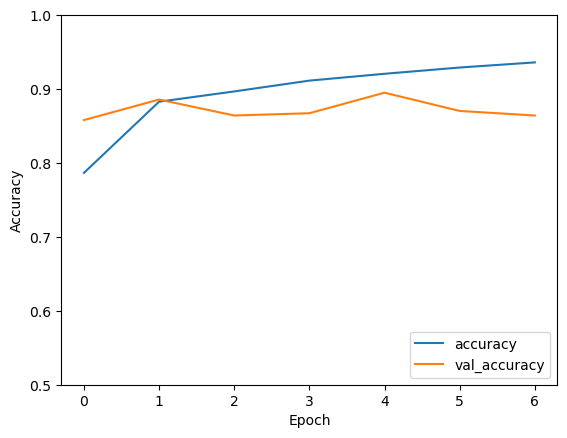

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Save the model

If you like your model, then save your model.

In [14]:
transfer_model.save('transferFirst.keras')

## Load the model if necessary

If you already saved a model, you can load it again.

In [15]:
transfer_model = tf.keras.models.load_model('transferRevised.keras')

ValueError: Layer 'dense_2' expected 1 input(s). Received 2 instead.

## Assess the model

Let's test the model on some new data. 

The `test` folder contains several subdirectories:
* `all` - All Niblet and not-Niblet images
* `test_niblet_alone` - Images of Niblet alone against a white backdrop
* `test_niblet_noshirt` - Images of Niblet alone against a white backdrop without Niblet's maroon shirt
* `test_niblet_others` - Images of Niblet with other stuffed toys against a white backdrop
* `test_niblet_natural` - Images of Niblet in natrual photos
* `test_not_niblet_alone` - Images of not-Niblet stuffed toys alone against a white backdrop
* `test_not_niblet_shirt` - Images of not-Niblet stuffed toys alone against a white backdrop wearing Niblet's maroon shirt
* `test_not_niblet_others` - Images of not-Niblet with other stuffed toys against a white backdrop
* `test_not_niblet_natural` - Images of not-Niblet in natural photos

I encourage you to make up your own test based on these folders.

### Test Final - 

In [16]:
# This is the validation set. Notice `shuffle = FALSE` and `subset = validation`
test_set = tf.keras.utils.image_dataset_from_directory(
    '../final/',
    class_names = ['not_niblet','niblet'],
    color_mode='rgb',
    batch_size=200,
    image_size=IMAGE_SIZE,
    shuffle=False,
    seed=SEED)

test_iterator = iter(test_set)
test_batch = next(test_iterator)

Found 4054 files belonging to 2 classes.


21/21 ━━━━━━━━━━━━━━━━━━━━ 93s 4s/step


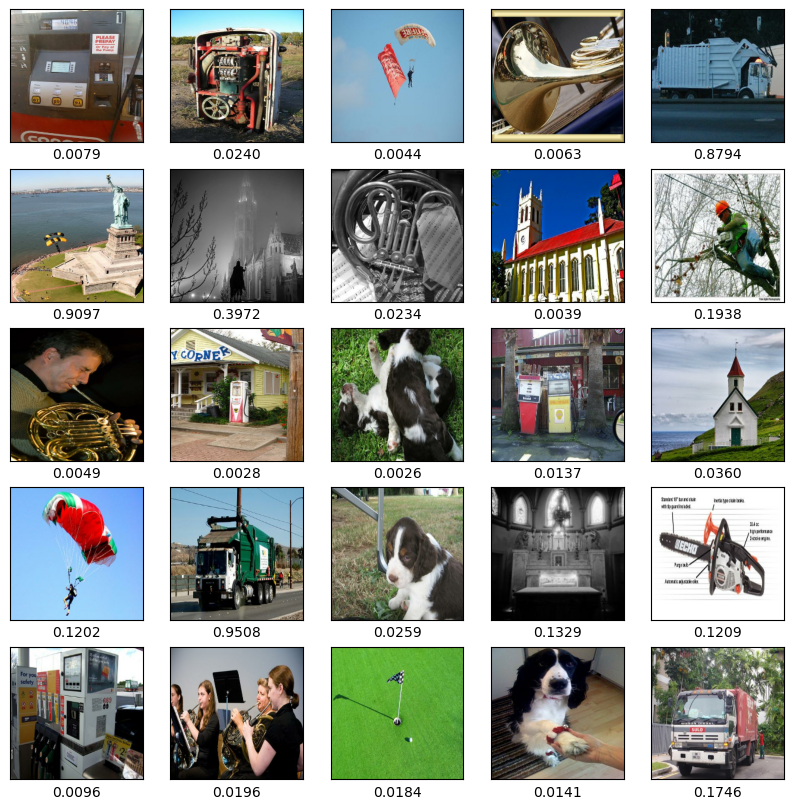

In [17]:
predictions = transfer_model.predict(test_set)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_batch[0][i]/255)
    plt.xlabel("{pred:.4f}".format(pred = predictions[i][0]))
plt.show()

In [18]:
transfer_model.evaluate(test_set, return_dict = True)

21/21 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.8777 - auc: 0.1360 - false_negatives: 0.0000e+00 - false_positives: 323.7273 - loss: 0.3106 - true_negatives: 1938.7727 - true_positives: 15.1364  


{'accuracy': 0.8502713441848755,
 'auc': 0.9975441098213196,
 'false_negatives': 0.0,
 'false_positives': 607.0,
 'loss': 0.3818877041339874,
 'true_negatives': 3318.0,
 'true_positives': 129.0}

### Test 2 - Images of not-Niblet stuffed toys alone against a white backdrop

In [ ]:
# This is the validation set. Notice `shuffle = FALSE` and `subset = validation`
test_set = tf.keras.utils.image_dataset_from_directory(
    '../test/test_not_niblet_alone/',
    class_names = ['not_niblet','niblet'],
    color_mode='rgb',
    batch_size=200,
    image_size=IMAGE_SIZE,
    shuffle=False,
    seed=SEED)

test_iterator = iter(test_set)
test_batch = next(test_iterator)

In [ ]:
predictions = transfer_model.predict(test_set)

plt.figure(figsize=(10,20))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_batch[0][i]/255)
    plt.xlabel("{pred:.4f}".format(pred = predictions[i][0]))
plt.show()

In [ ]:
transfer_model.evaluate(test_set, return_dict = True)

### Test 3 - All images

In [ ]:
# This is the validation set. Notice `shuffle = FALSE` and `subset = validation`
test_set = tf.keras.utils.image_dataset_from_directory(
    '../test/all/',
    class_names = ['not_niblet','niblet'],
    color_mode='rgb',
    batch_size=200,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=SEED)

test_iterator = iter(test_set)
test_batch = next(test_iterator)

In [ ]:
predictions = transfer_model.predict(test_set)

plt.figure(figsize=(10,20))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_batch[0][i]/255)
    plt.xlabel("{pred:.4f}".format(pred = predictions[i][0]))
plt.show()

In [ ]:
transfer_model.evaluate(test_set, return_dict = True)